In [1]:
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def load_dicts_from_pkl(path):
    dictionaries = {}
    
    for file_name in os.listdir(path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(path, file_name)
            name = os.path.splitext(file_name)[0]
            
            with open(file_path, 'rb') as file:
                dictionary = pickle.load(file)
                dictionaries[name] = dictionary
    
    return dictionaries

In [3]:
models_dict_1 = load_dicts_from_pkl("loss_histories/damping_1")
models_dict_5 = load_dicts_from_pkl("loss_histories/damping_5")
models_dict_10 = load_dicts_from_pkl("loss_histories/damping_10")

In [4]:
def plot_history(models_dict, train=True):
    plt.figure(figsize=(10, 6))
    suff = '_train' if train else ''
    
    for key, model_dict in models_dict.items():
        
        
        epsilon = model_dict["constraint_losses"]["repulsive"]["epsilon"]
        damping = model_dict["constraint_losses"]["repulsive"]["damping_factor"]
        
        label = f'Epsilon = {epsilon}, Damping factor {damping}'
        plt.plot(model_dict['loss_history']['attractive'+suff], 
                 model_dict['loss_history']['repulsive'+suff],
                 marker='o', markersize=3, label=label)
        plt.text(model_dict['loss_history']['attractive'+suff][-1],
                 model_dict['loss_history']['repulsive'+suff][-1],
                 f'{model_dict["loss_history"]["attractive"+suff][-1]:.8f}', ha='center', va='bottom')

    plt.xlabel('embedding_loss_attractive'+suff)
    plt.ylabel('embedding_loss_repulsive'+suff)
    plt.title('Loss Functions')

    plt.legend()
    plt.show()

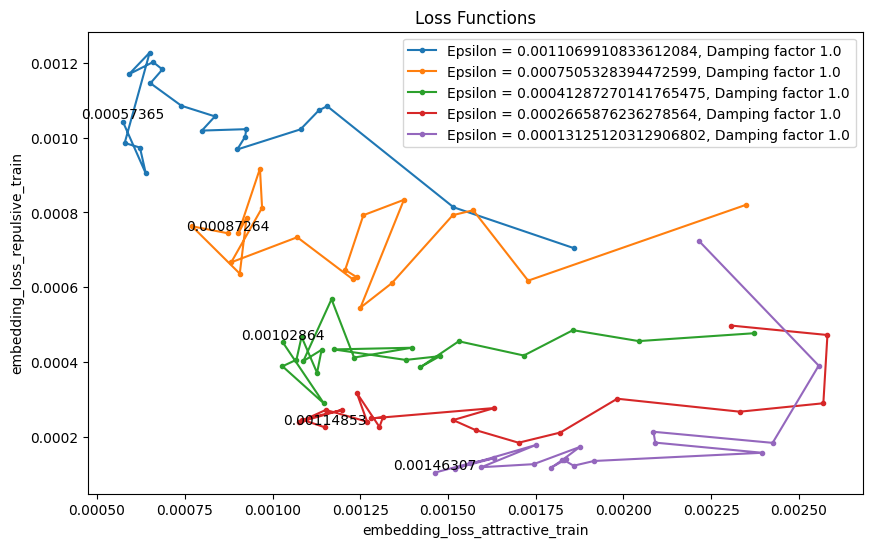

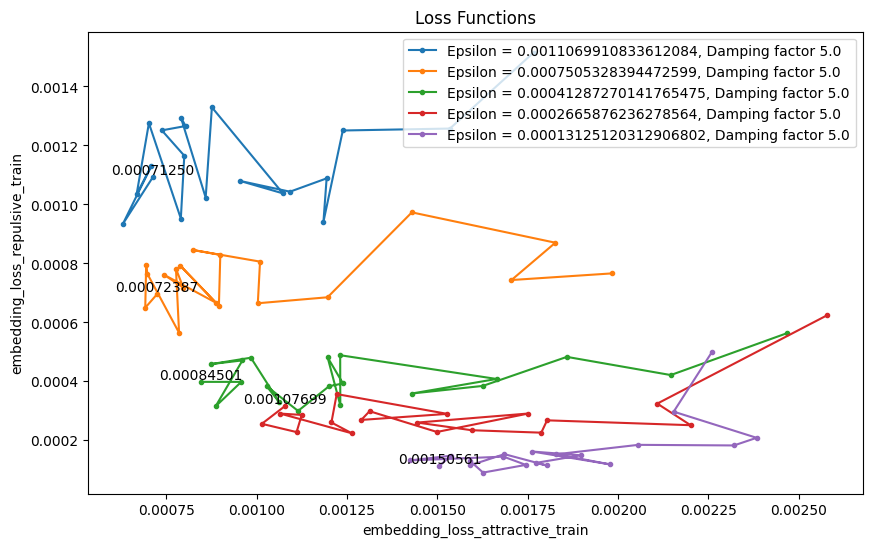

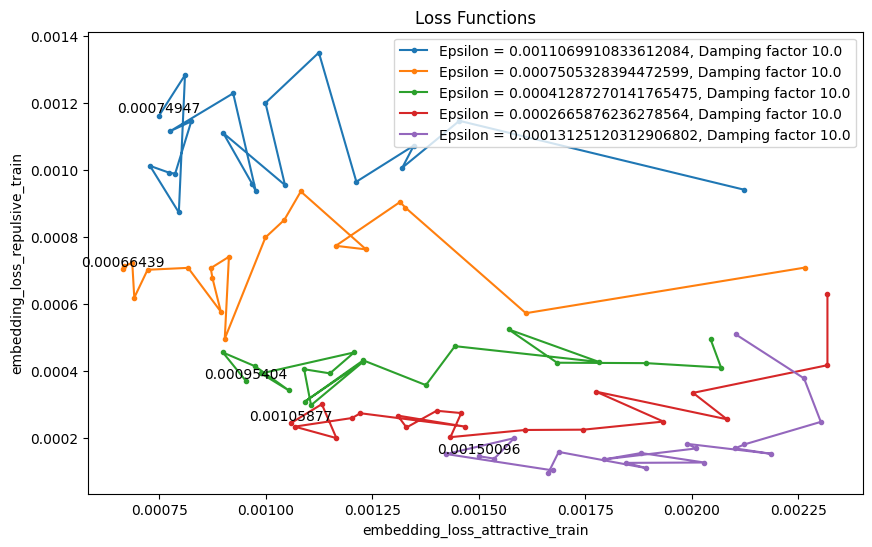

In [5]:
plot_history(models_dict_1)
plot_history(models_dict_5)
plot_history(models_dict_10)

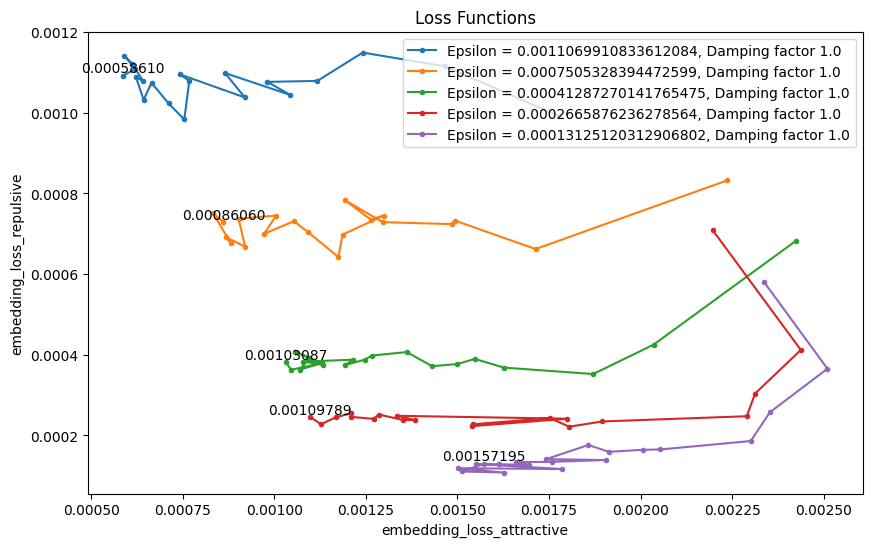

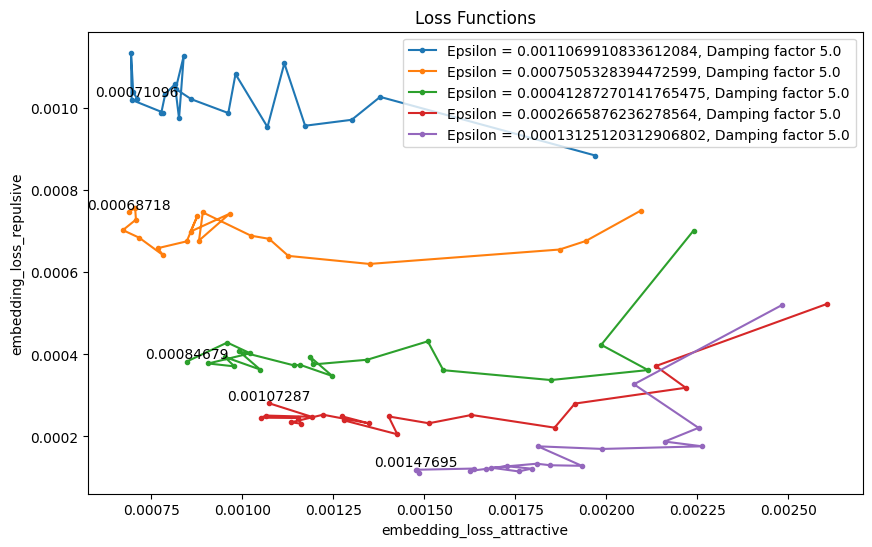

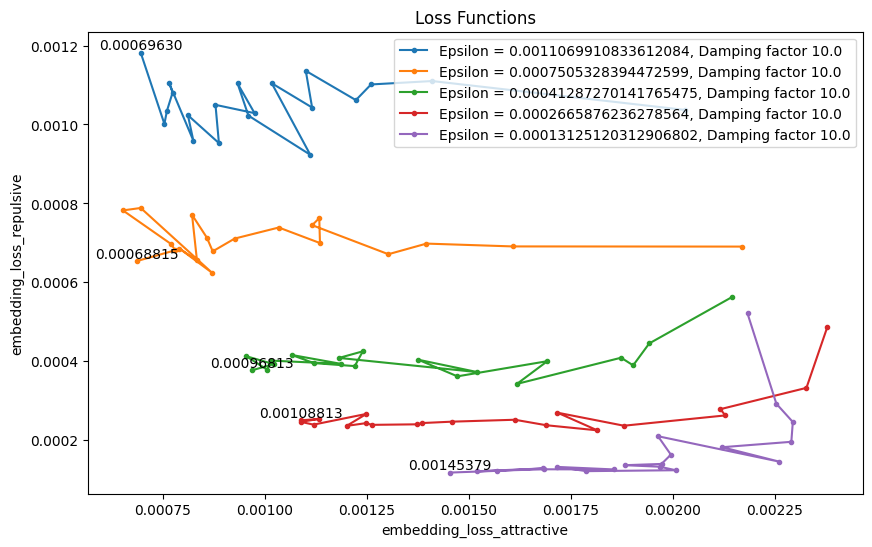

In [6]:
plot_history(models_dict_1, train=False)
plot_history(models_dict_5, train=False)
plot_history(models_dict_10, train=False)

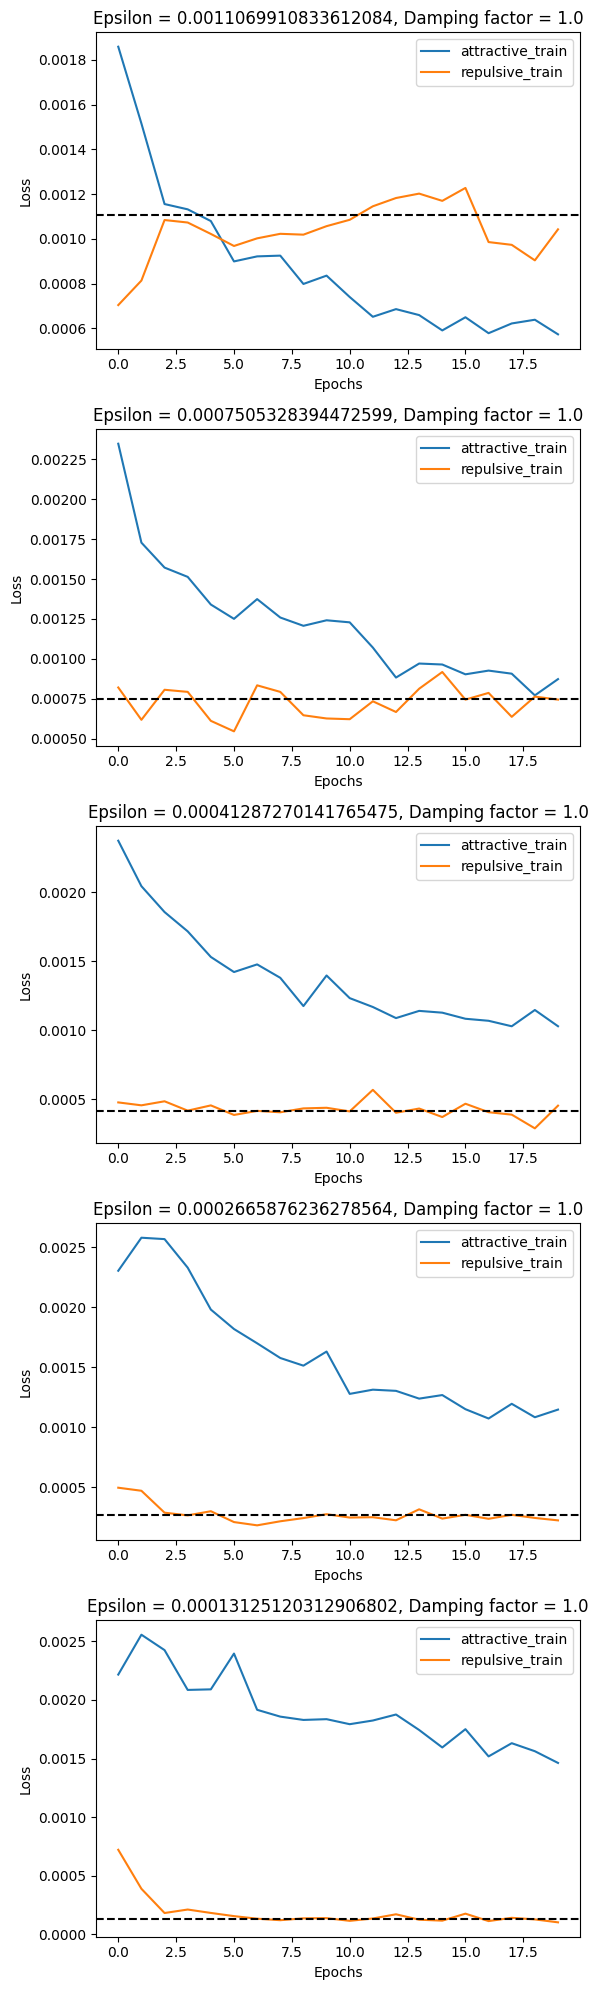

In [7]:
# Create subplots
fig, axs = plt.subplots(len(models_dict_1), 1, figsize=(6, 4*len(models_dict_1)))

for i, (key, model_dict) in enumerate(models_dict_1.items()):
    epsilon = model_dict["constraint_losses"]["repulsive"]["epsilon"]
    damping = model_dict["constraint_losses"]["repulsive"]["damping_factor"]
    
    axs[i].plot(model_dict['loss_history']['attractive_train'], label='attractive_train')
    axs[i].plot(model_dict['loss_history']['repulsive_train'], label='repulsive_train')
    axs[i].axhline(epsilon, linestyle='--', color='black')

    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'Epsilon = {epsilon}, Damping factor = {damping}')
    axs[i].legend()

plt.tight_layout()
plt.show()

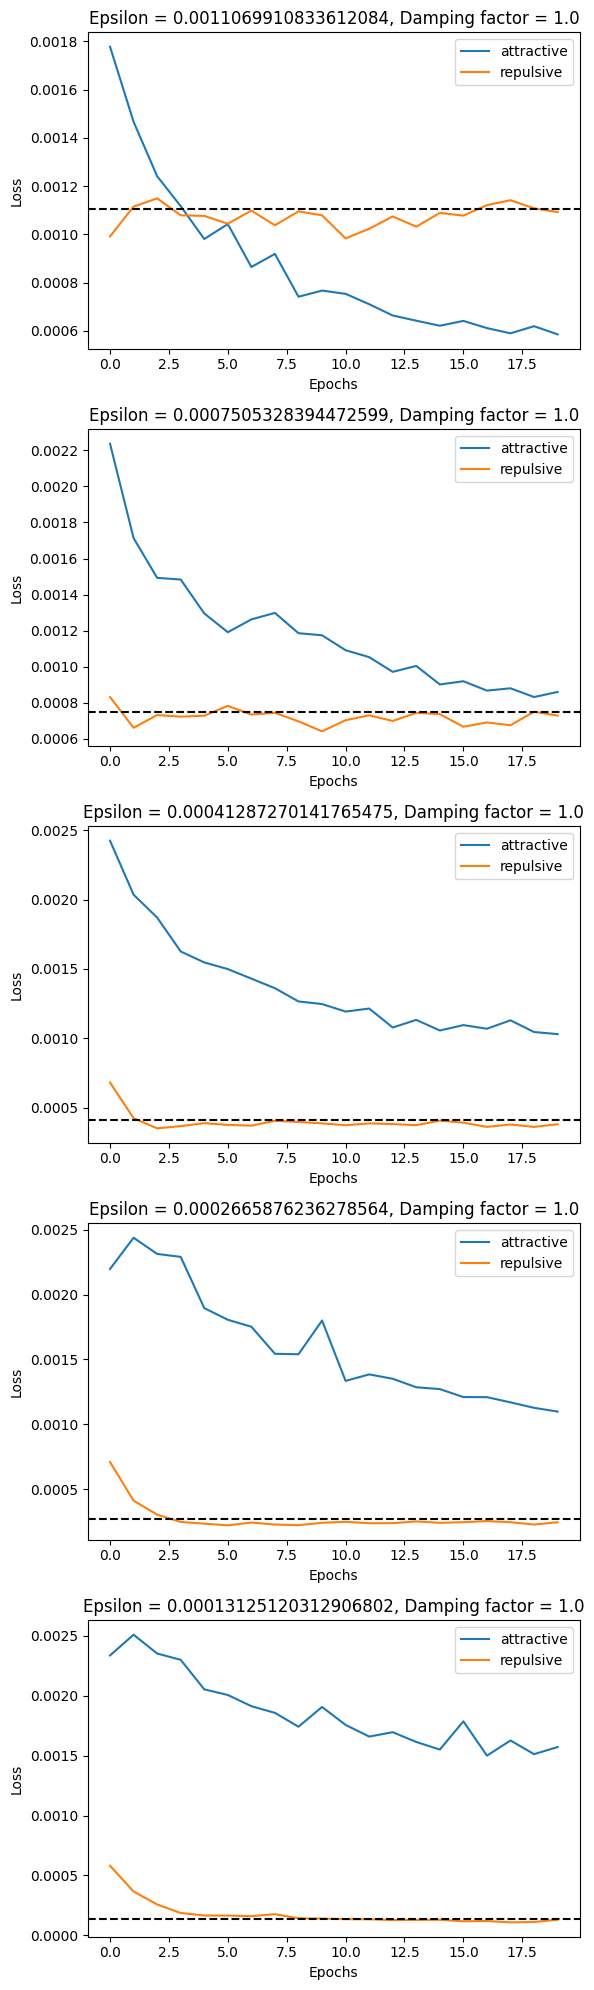

In [8]:
# Create subplots
fig, axs = plt.subplots(len(models_dict_1), 1, figsize=(6, 4*len(models_dict_1)))

for i, (key, model_dict) in enumerate(models_dict_1.items()):
    epsilon = model_dict["constraint_losses"]["repulsive"]["epsilon"]
    damping = model_dict["constraint_losses"]["repulsive"]["damping_factor"]
    
    axs[i].plot(model_dict['loss_history']['attractive'], label='attractive')
    axs[i].plot(model_dict['loss_history']['repulsive'], label='repulsive')
    axs[i].axhline(epsilon, linestyle='--', color='black')

    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'Epsilon = {epsilon}, Damping factor = {damping}')
    axs[i].legend()

plt.tight_layout()
plt.show()